In [37]:

import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import sweetviz as sv
import joblib
import os
from scipy import stats



In [41]:
data = pd.read_csv('./data/Training.csv')
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

**Checking NaN**

                                             |          | [  0%]   00:00 -> (? left)

/opt/anaconda3/lib/python3.12/site-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/opt/anaconda3/lib/python3.12/site-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/opt/anaconda3/lib/python3.12/site-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 


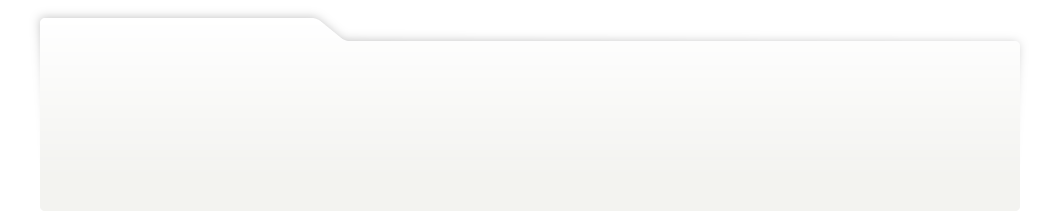
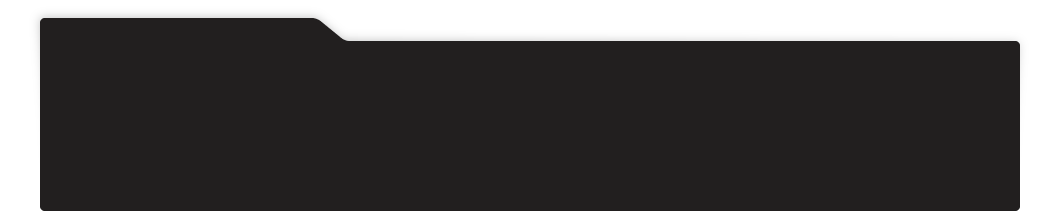
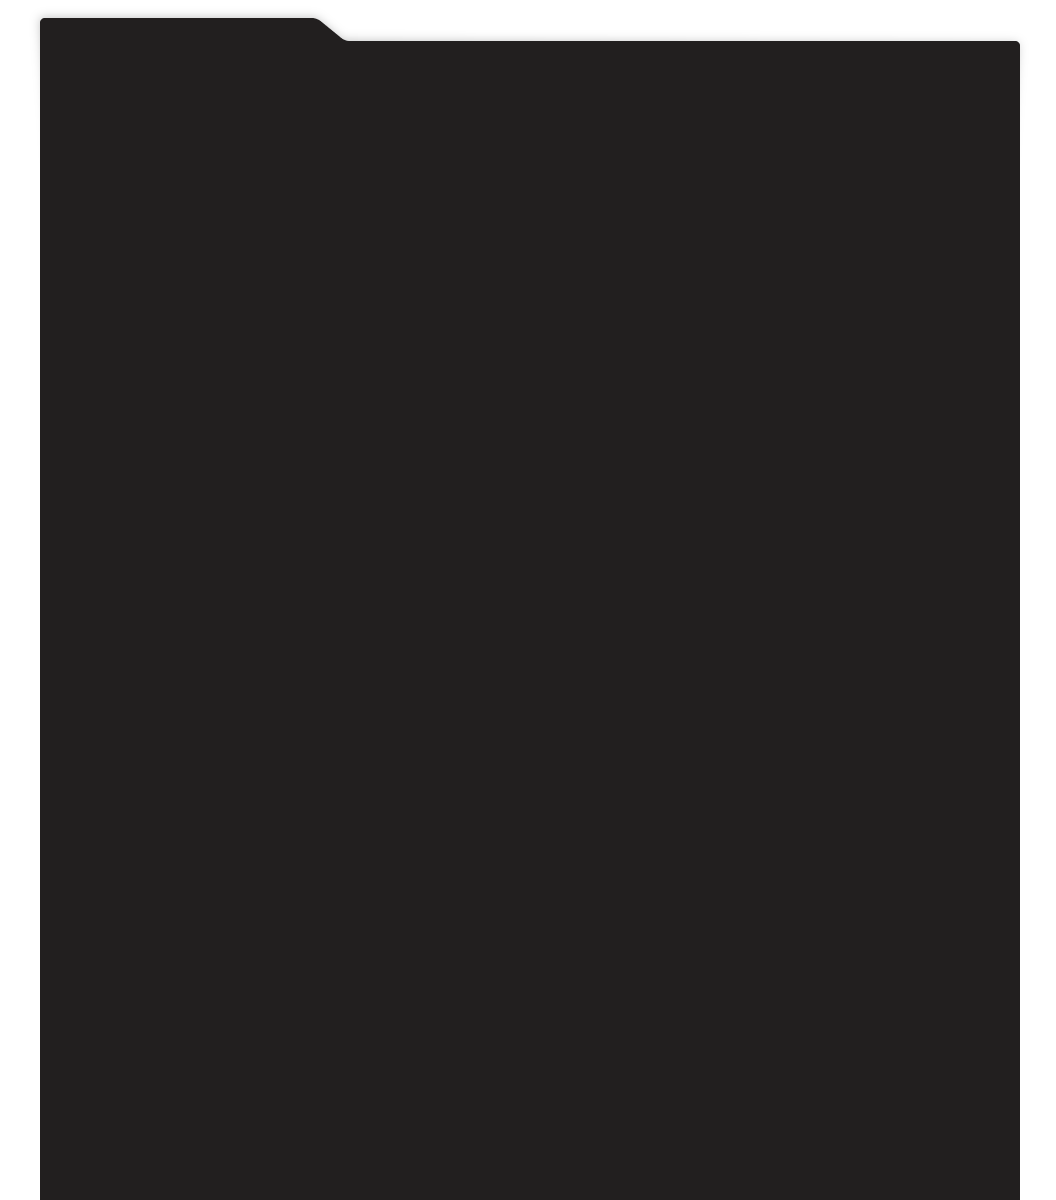
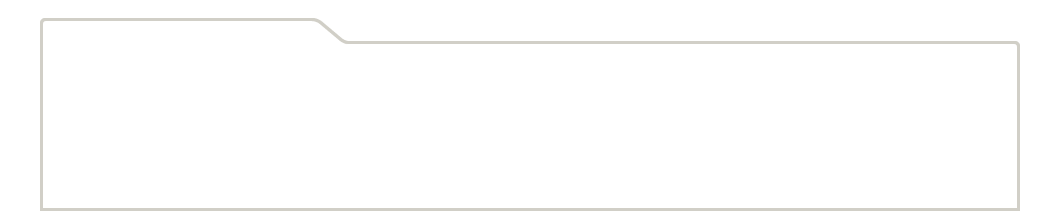
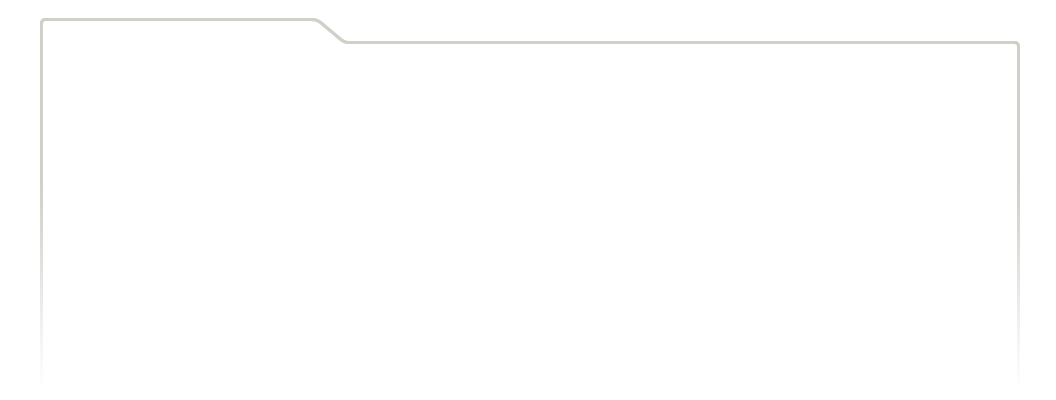
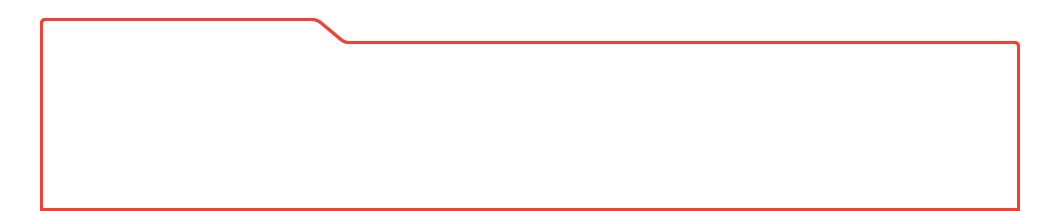
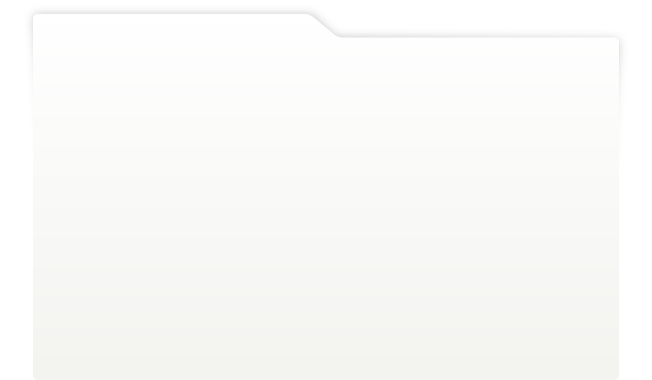
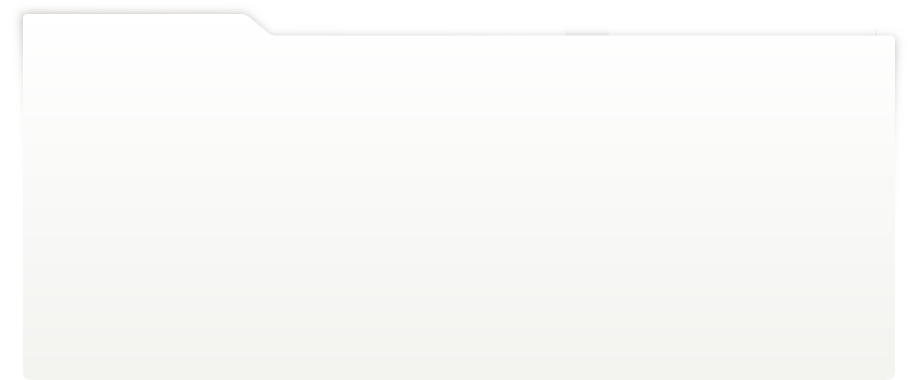
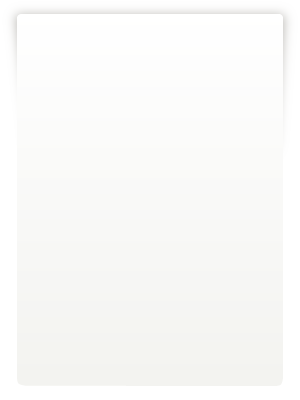
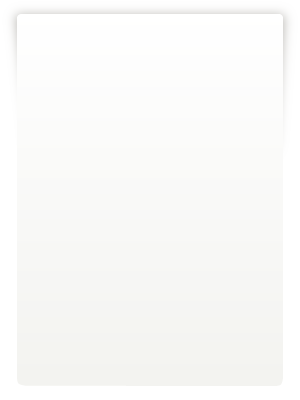
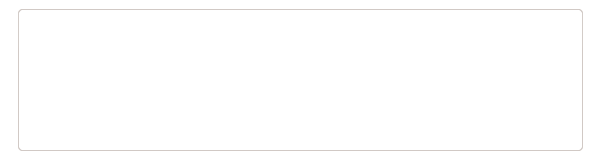
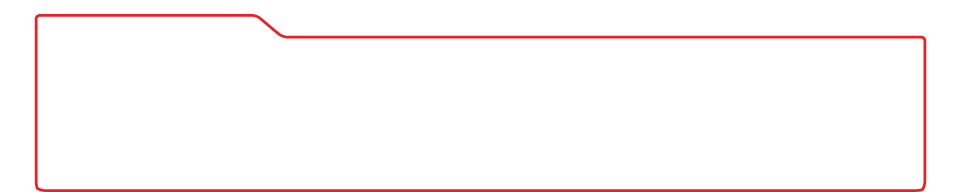
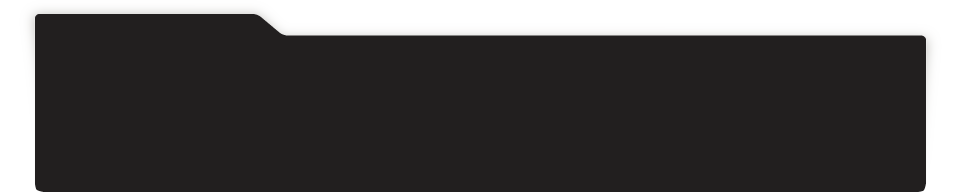
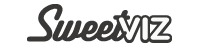
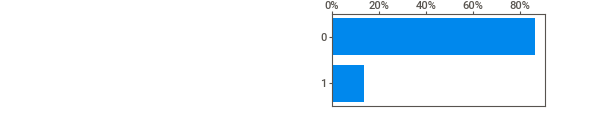
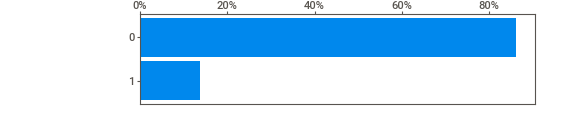
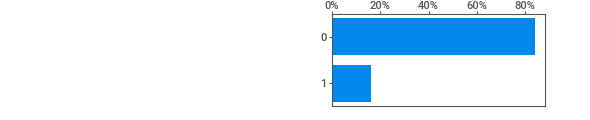
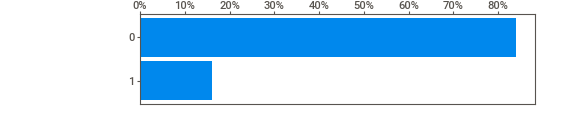
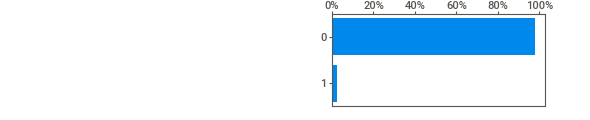
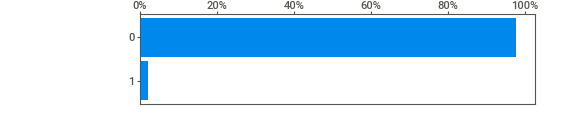
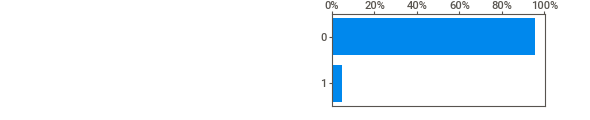
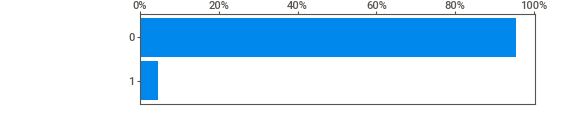
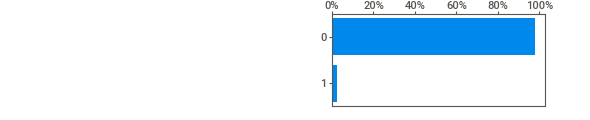
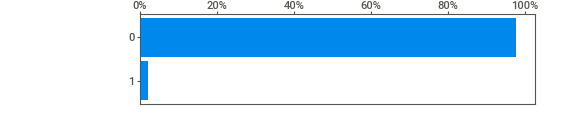
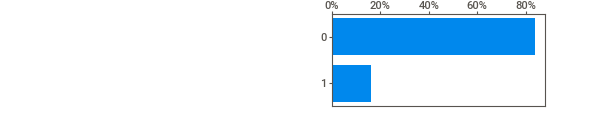
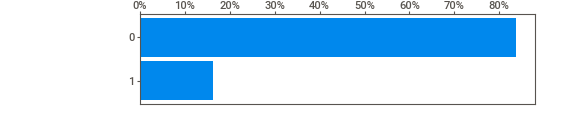
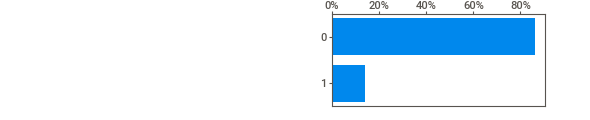
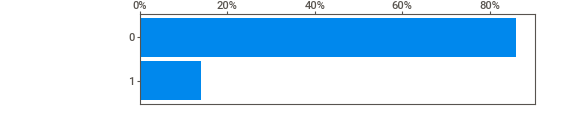
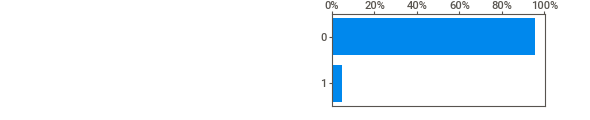
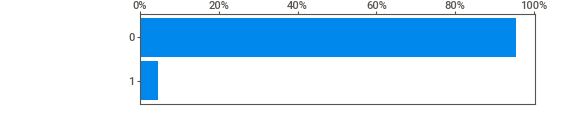
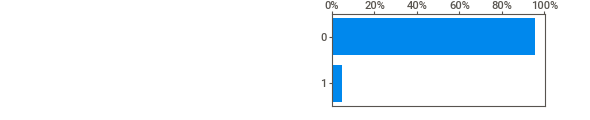
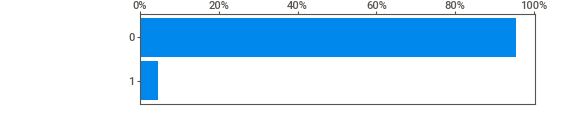
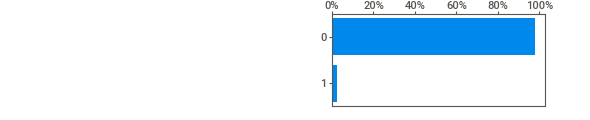
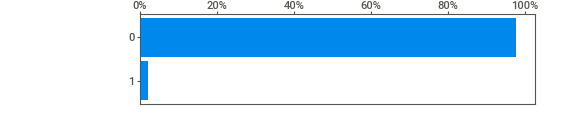
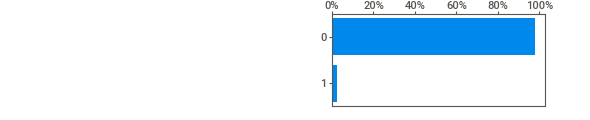
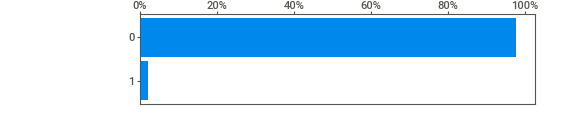
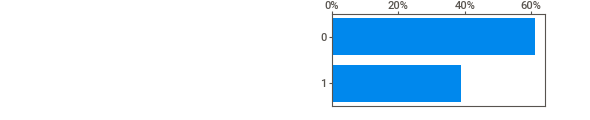
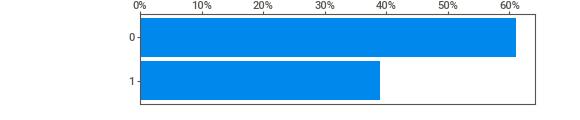
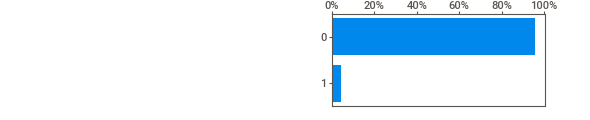
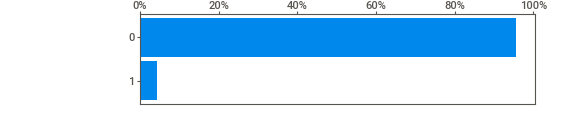
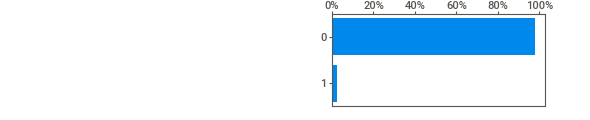
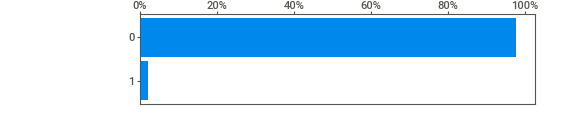
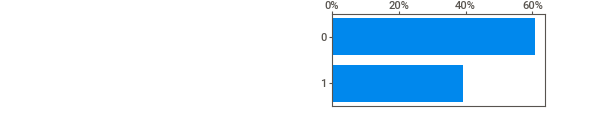
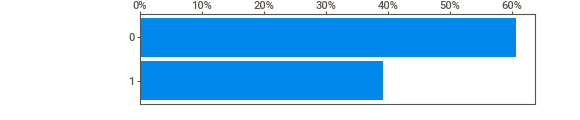
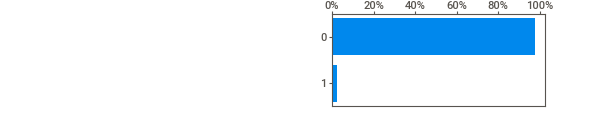
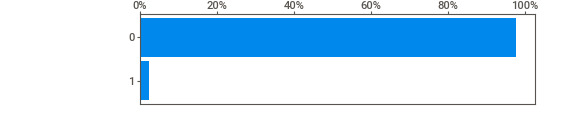
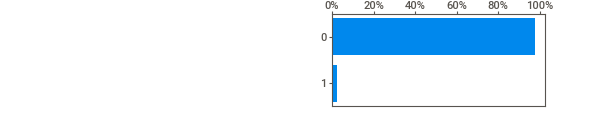
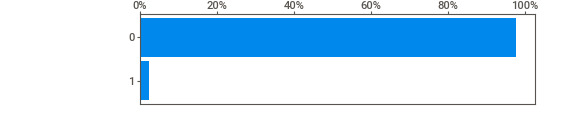
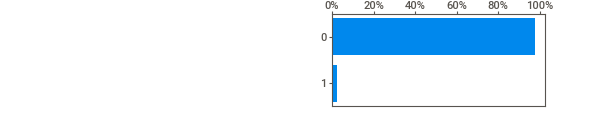
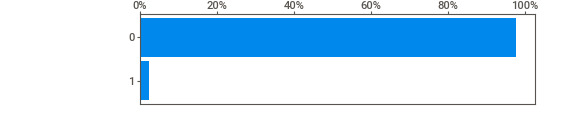
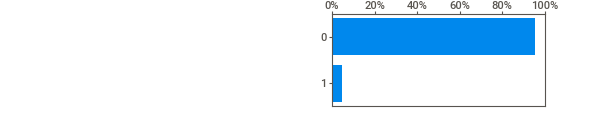
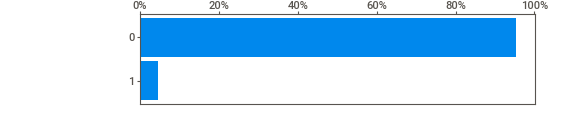
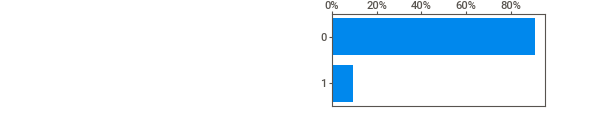
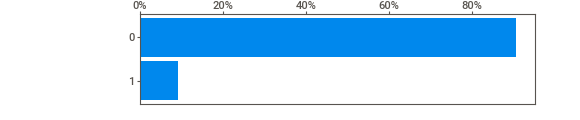
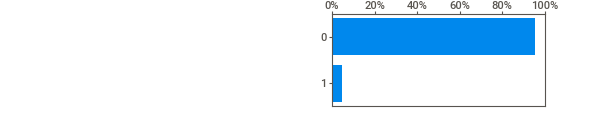
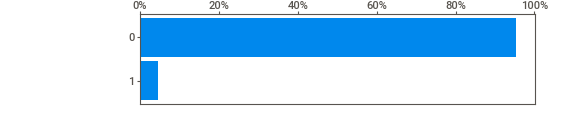
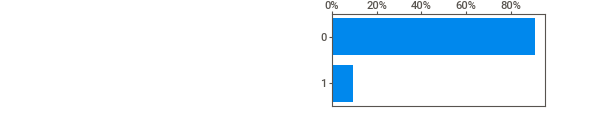
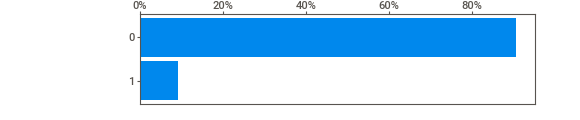
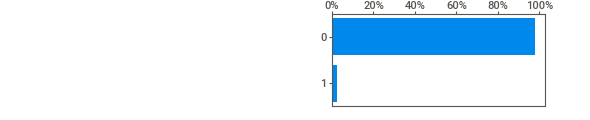
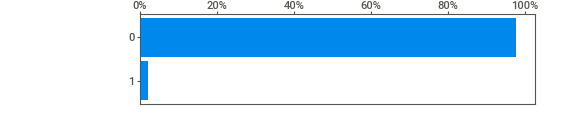
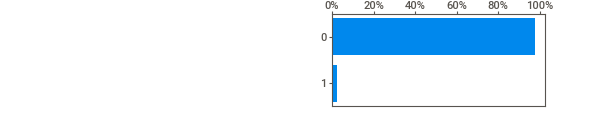
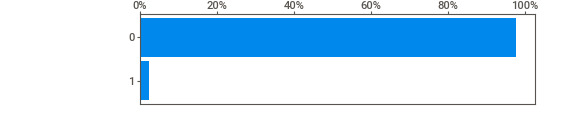
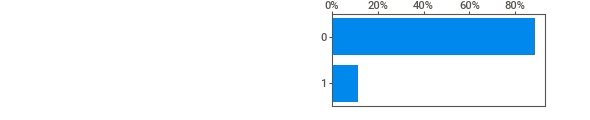
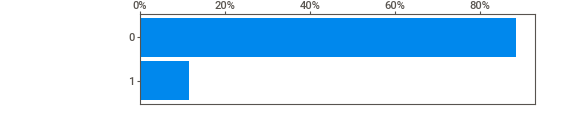
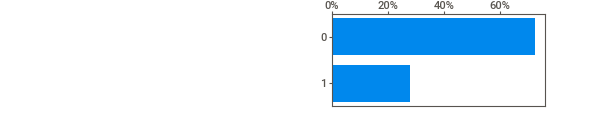
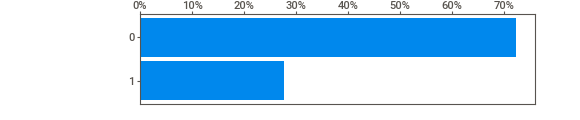
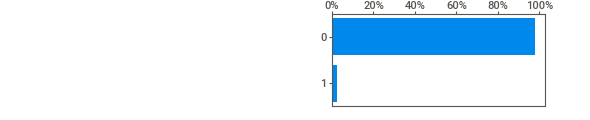
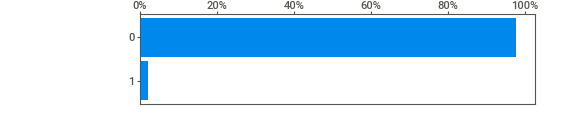
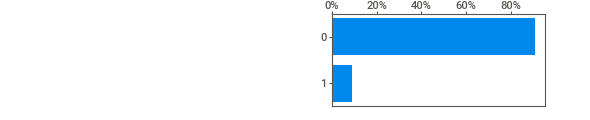
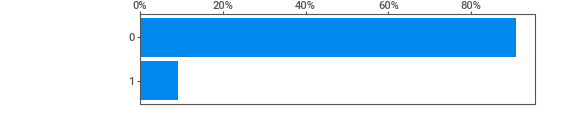
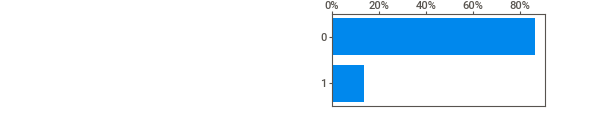
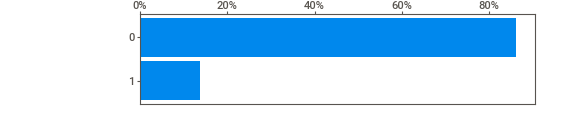
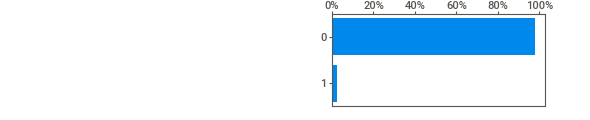
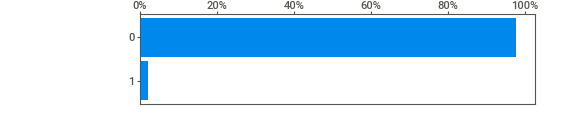
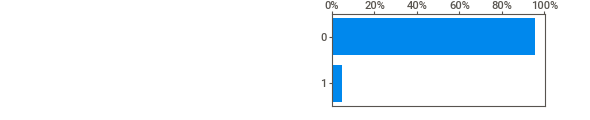
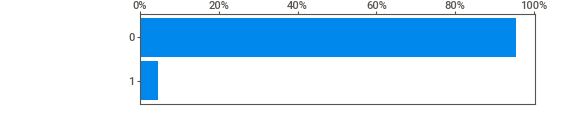
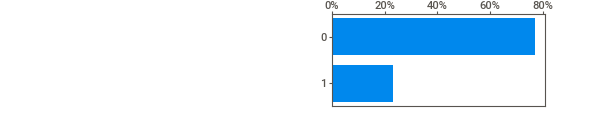
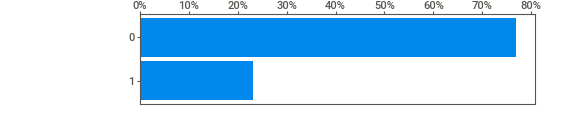
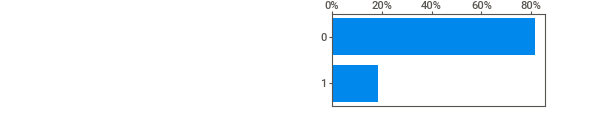
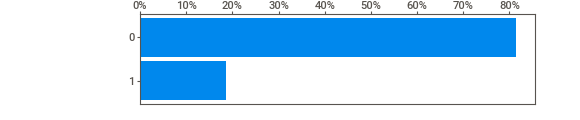
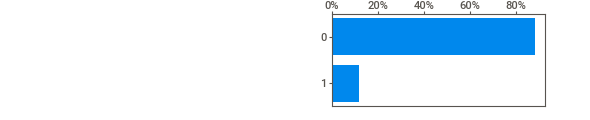
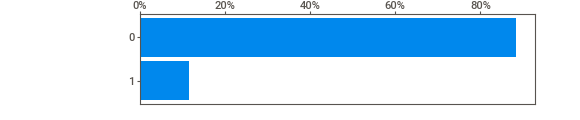
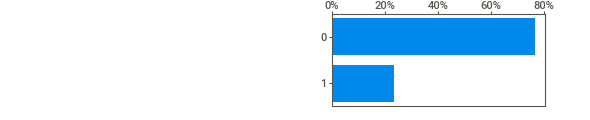
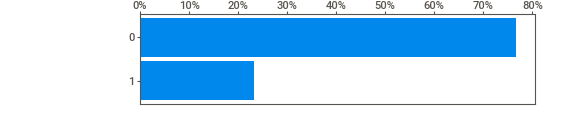
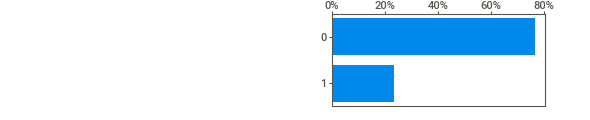
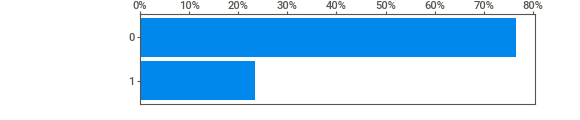
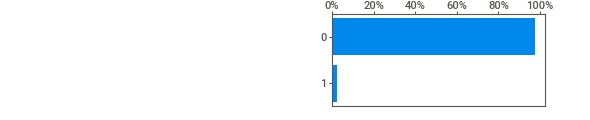
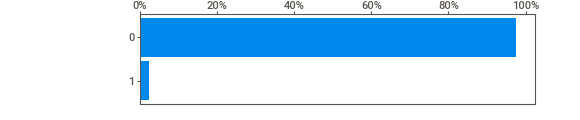
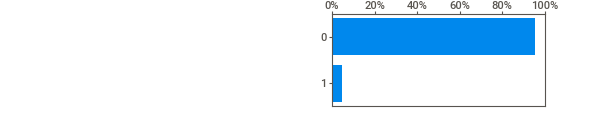
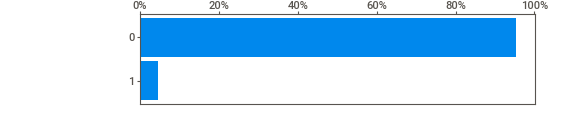
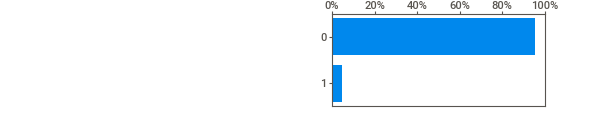
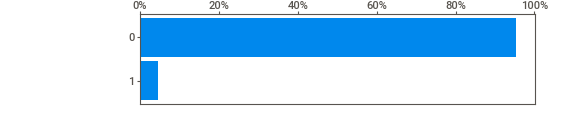
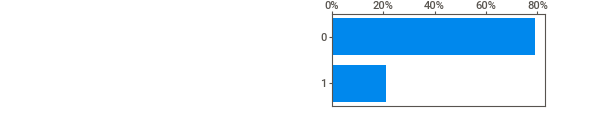
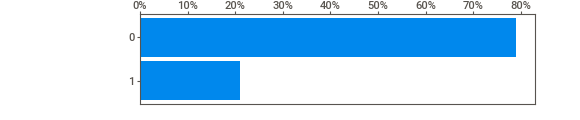
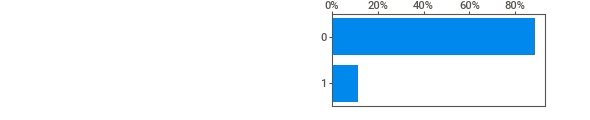
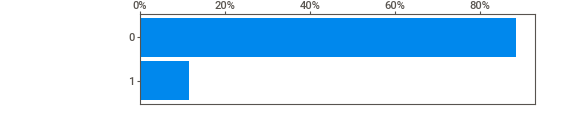
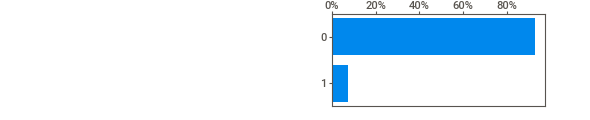
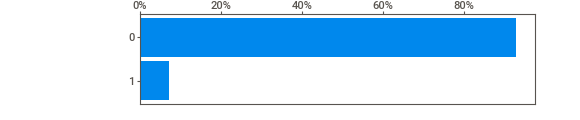
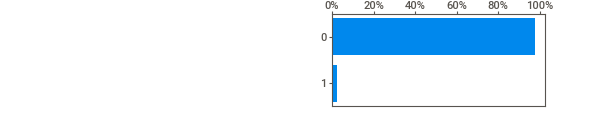
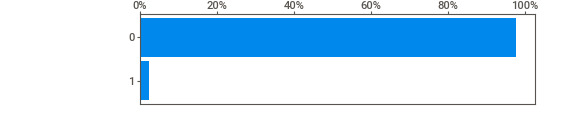
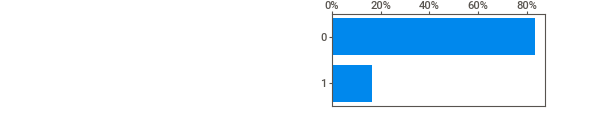
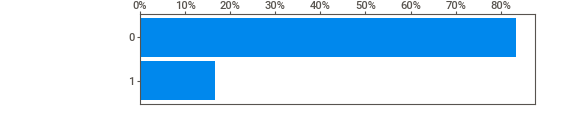
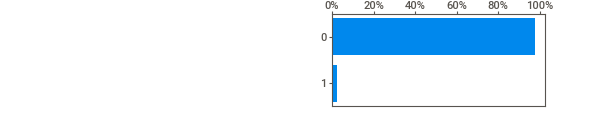
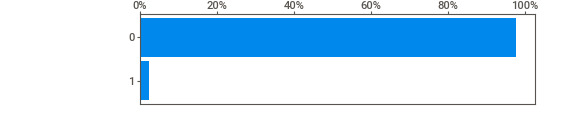
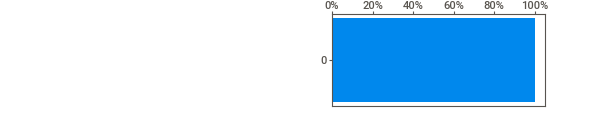
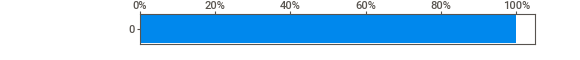
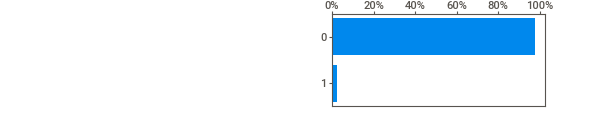
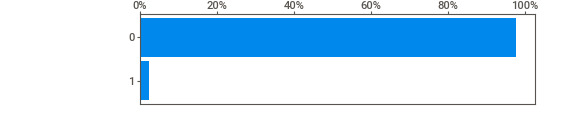
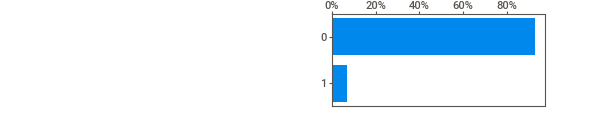
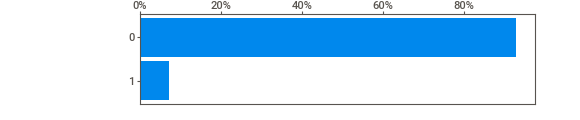
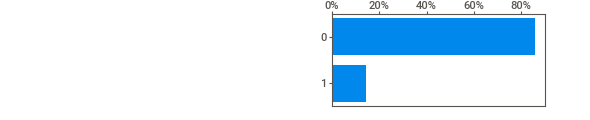
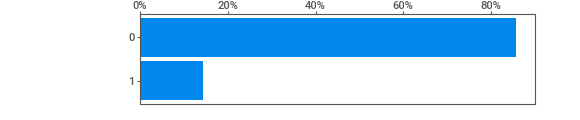
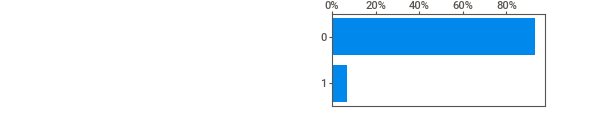
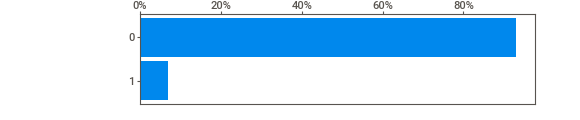
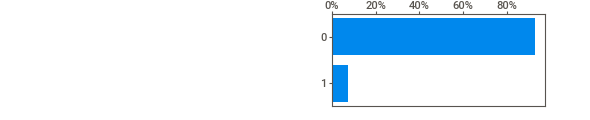
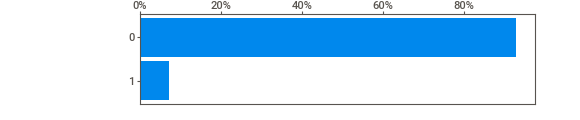
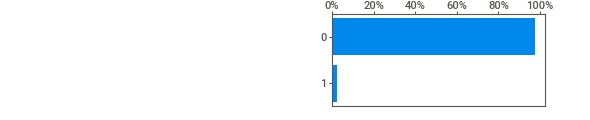
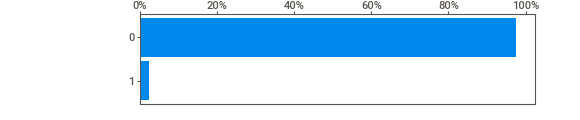
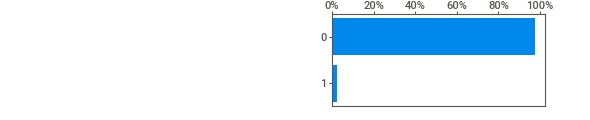
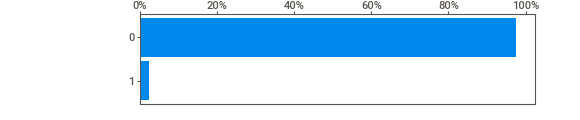
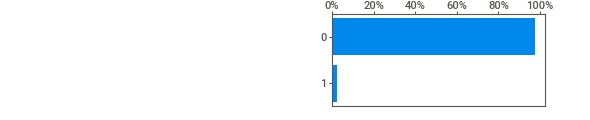
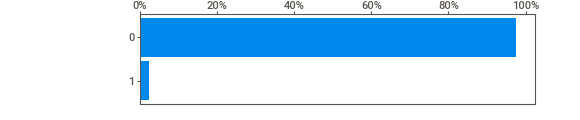
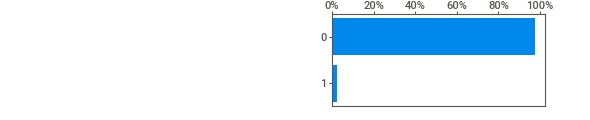
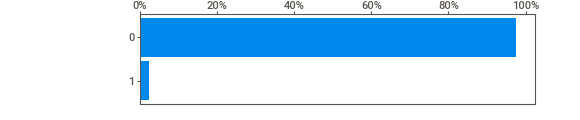
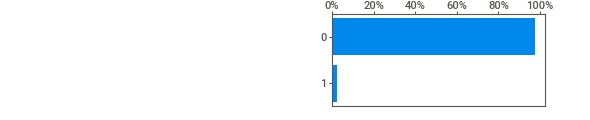
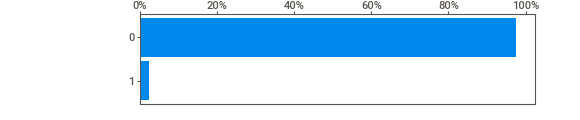
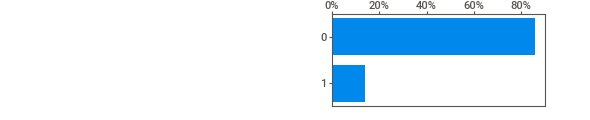
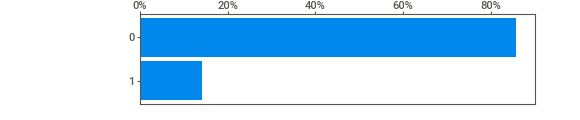
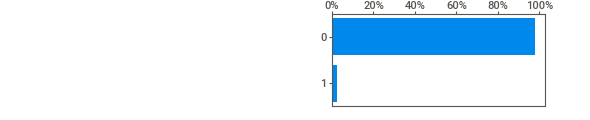
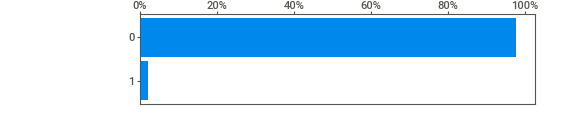
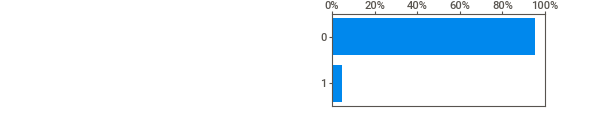
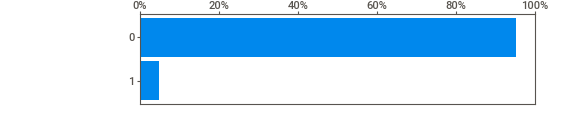
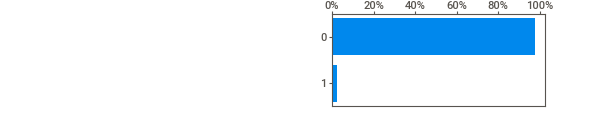
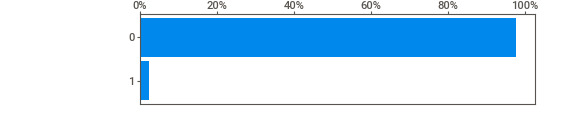
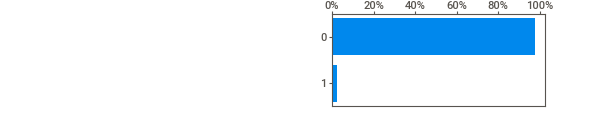
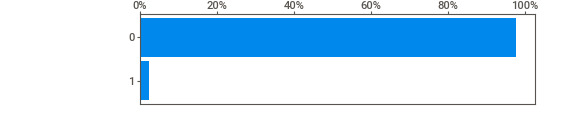
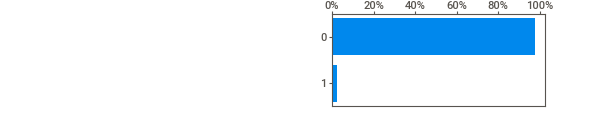
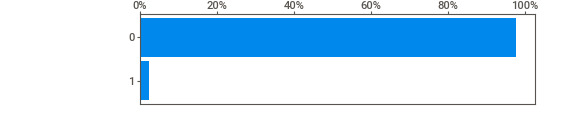
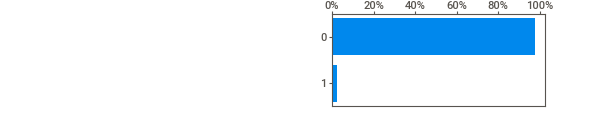
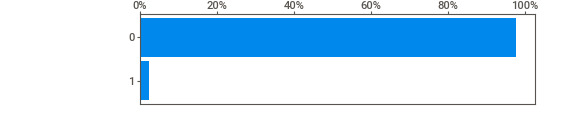
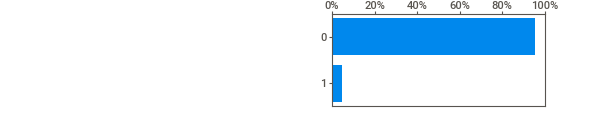
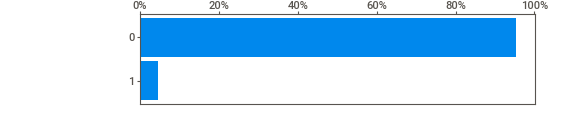
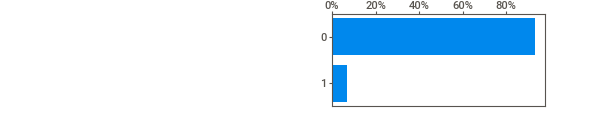
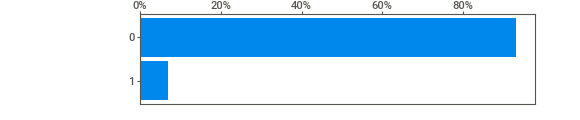
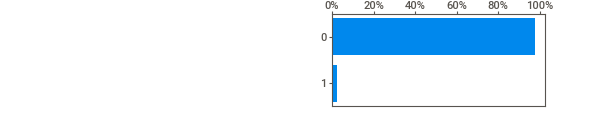
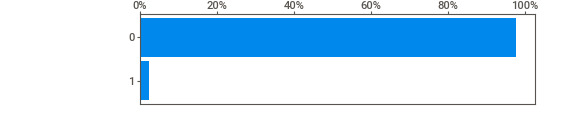
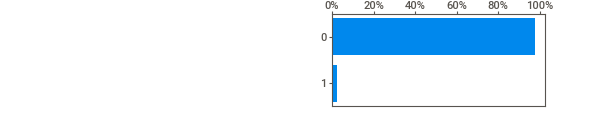
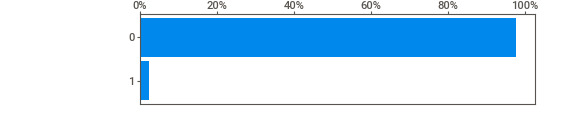
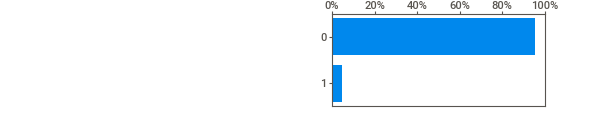
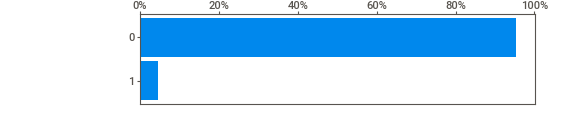
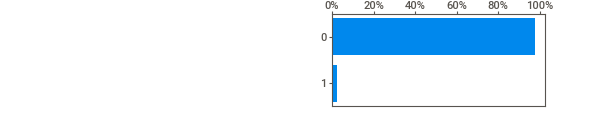
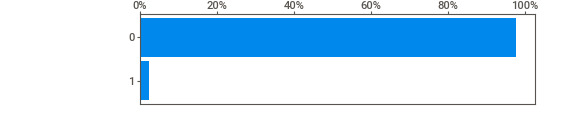
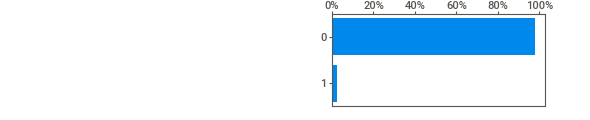
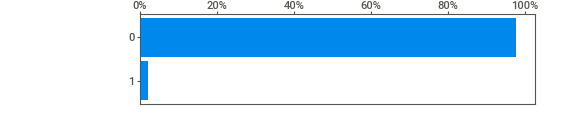
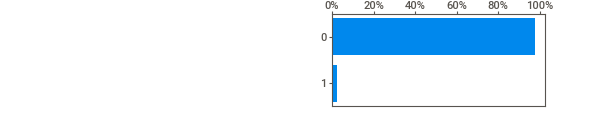
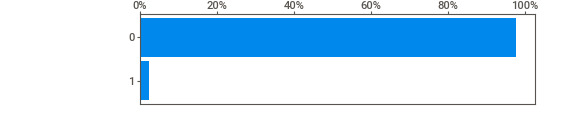
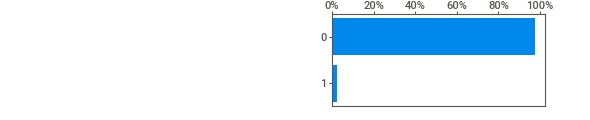
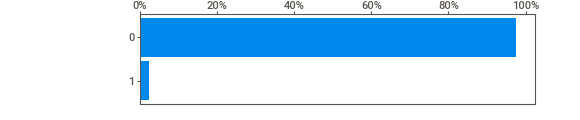
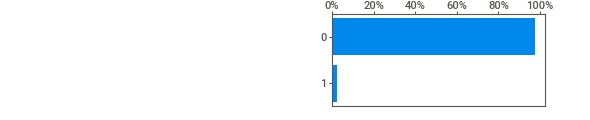
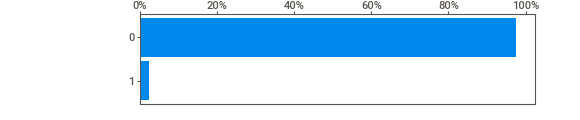
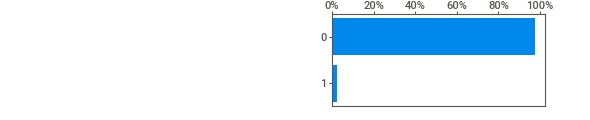
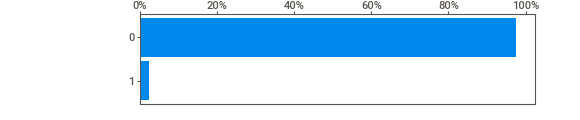
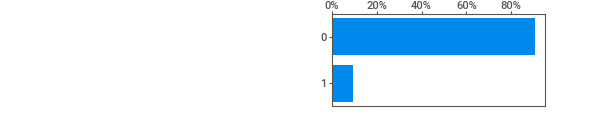
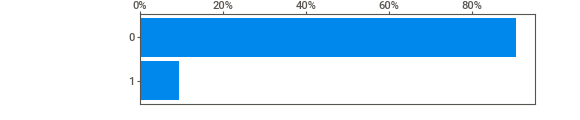
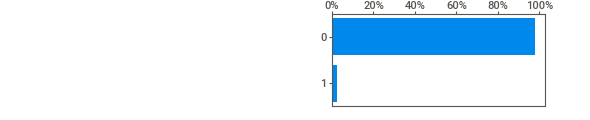
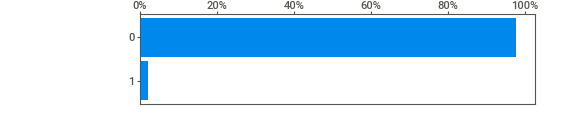
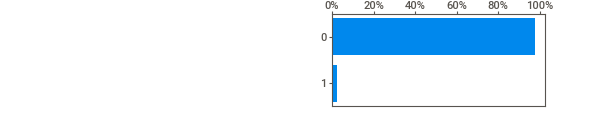
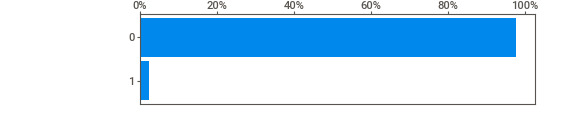
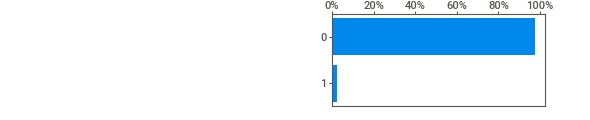
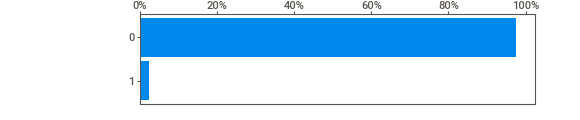
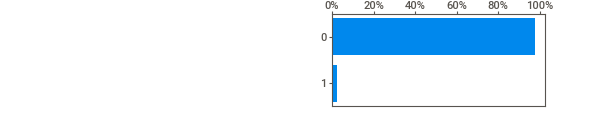
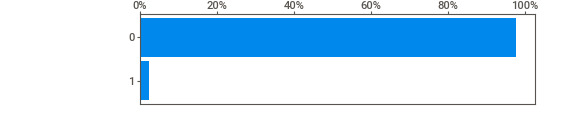
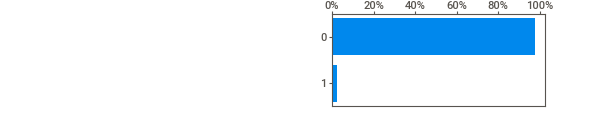
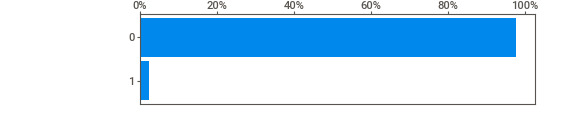
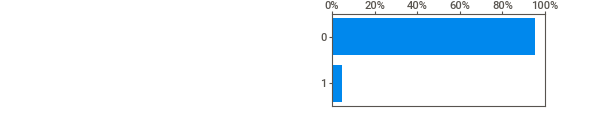
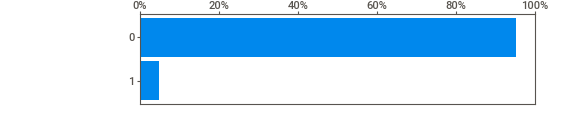
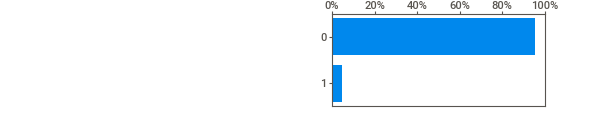
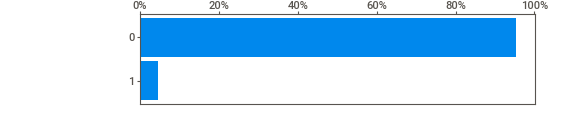
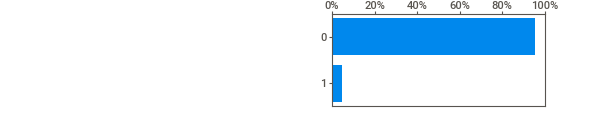
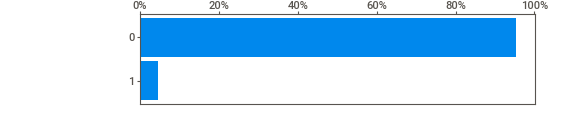
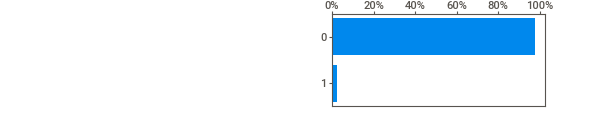
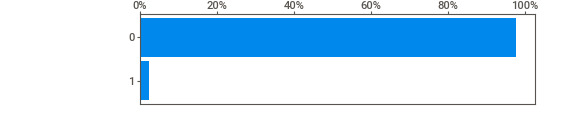
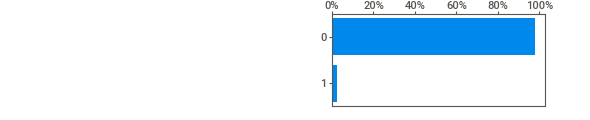
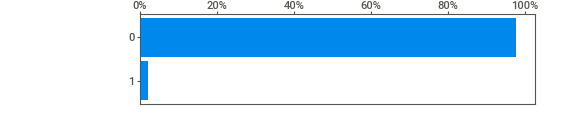
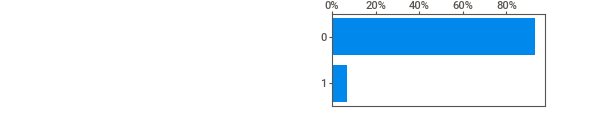
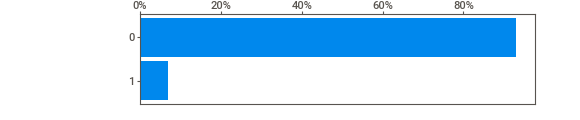
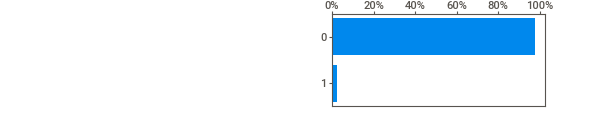
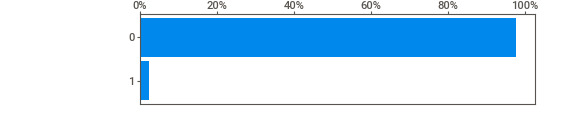
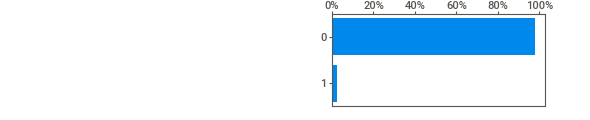
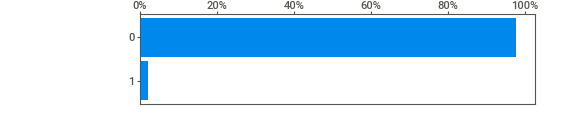
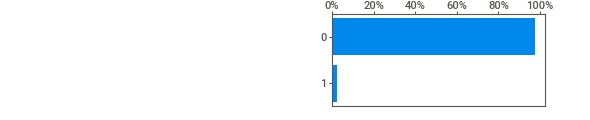
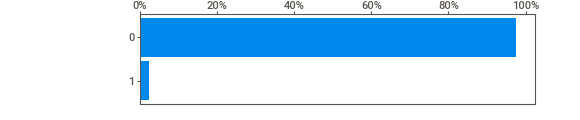
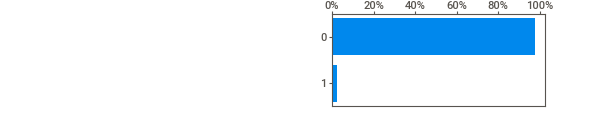
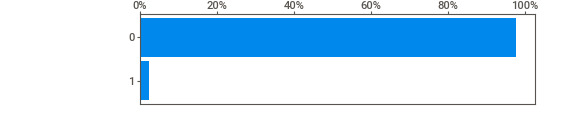
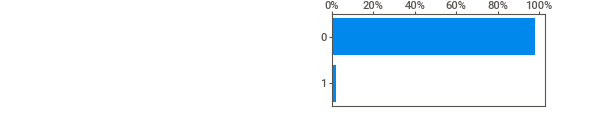
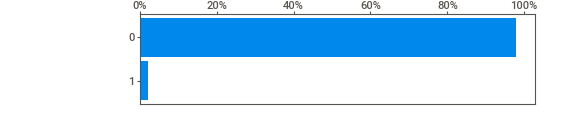
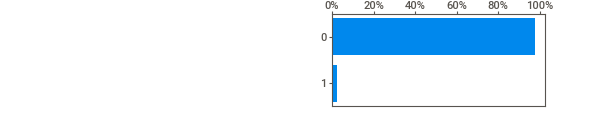
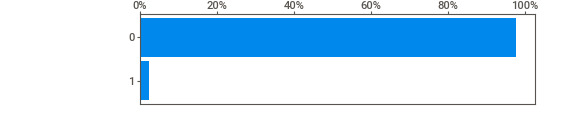
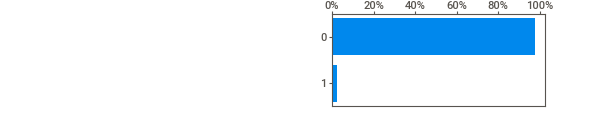
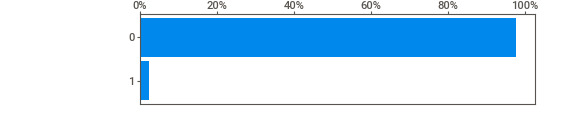
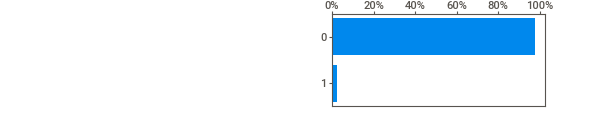
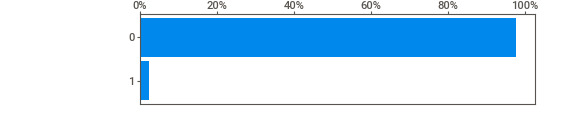
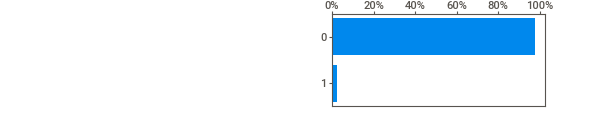
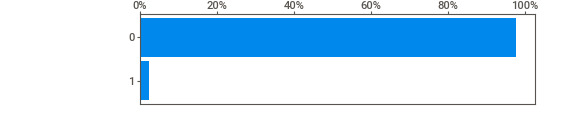
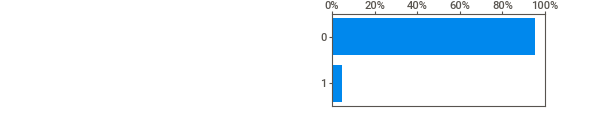
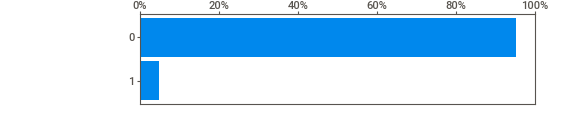
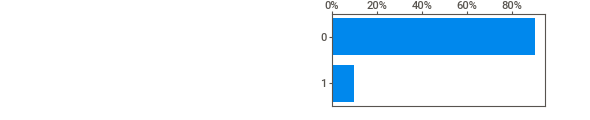
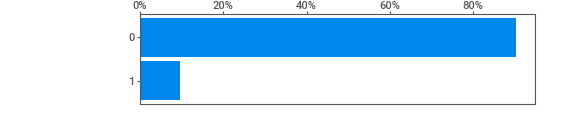
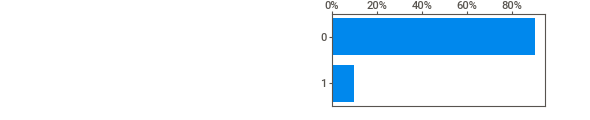
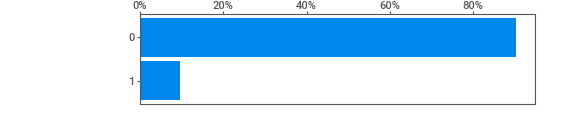
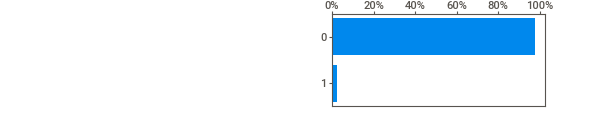
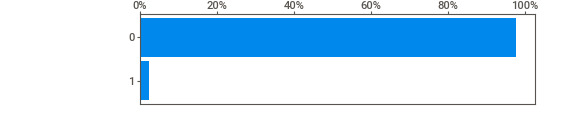
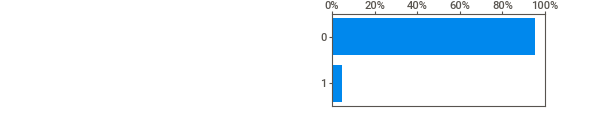
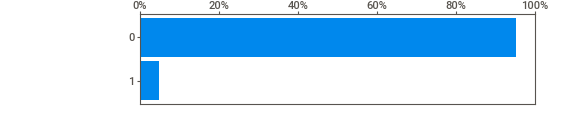
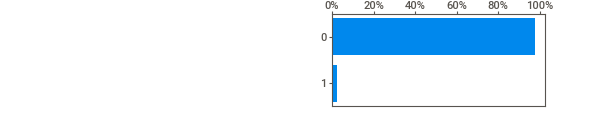
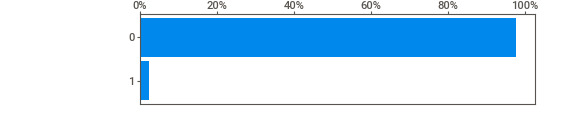
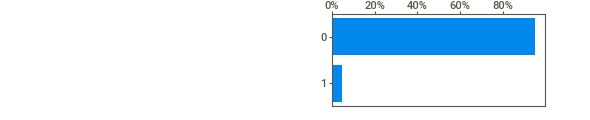
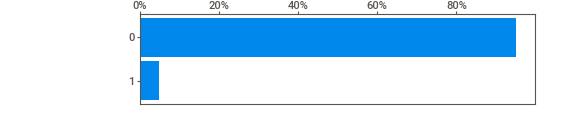
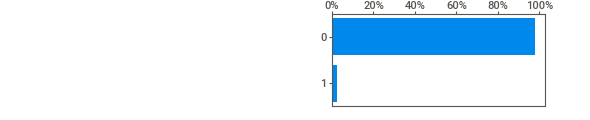
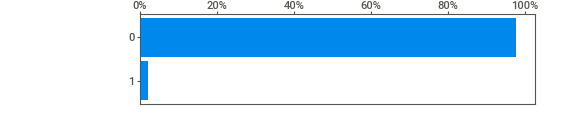
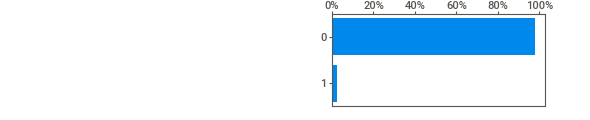
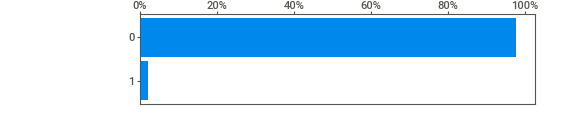
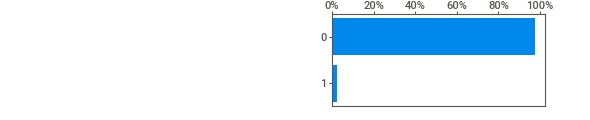
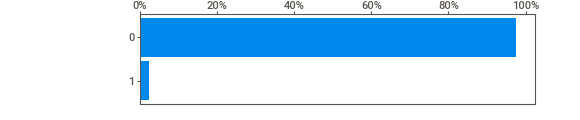
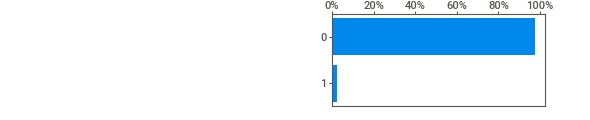
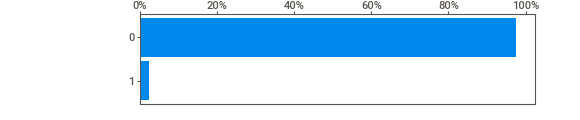
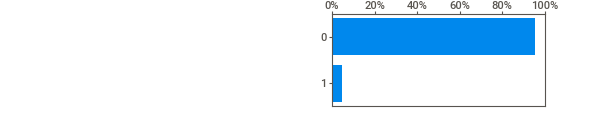
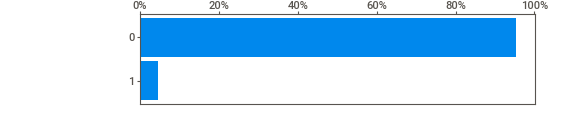
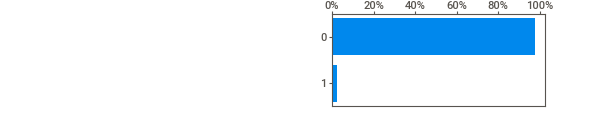
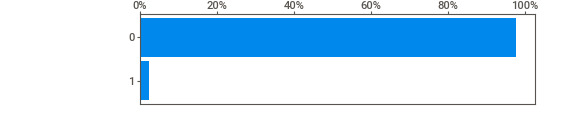
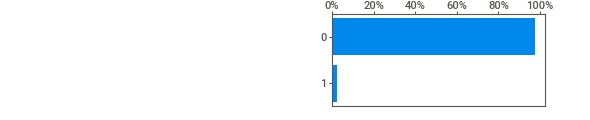
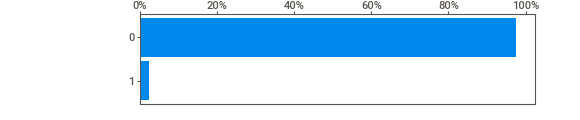
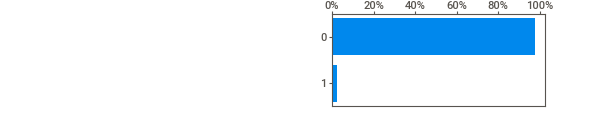
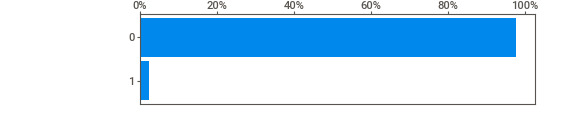
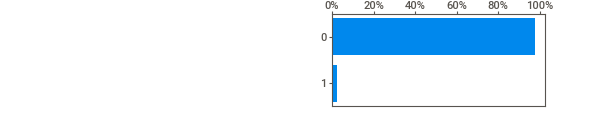
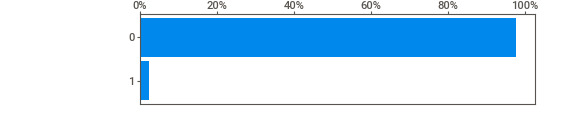
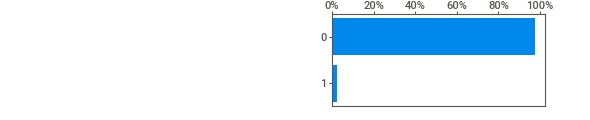
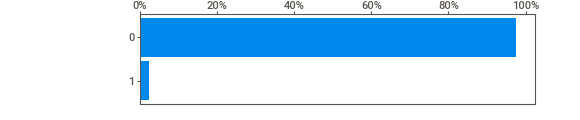
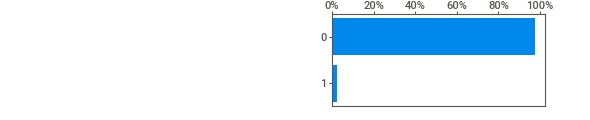
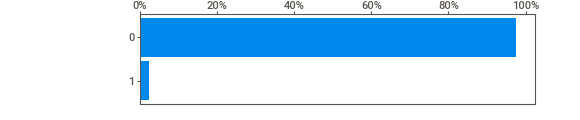
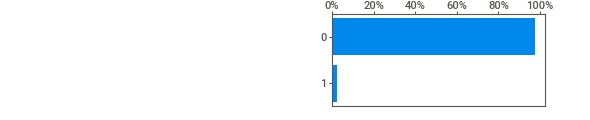
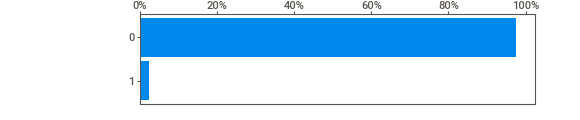
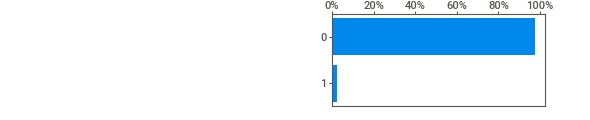
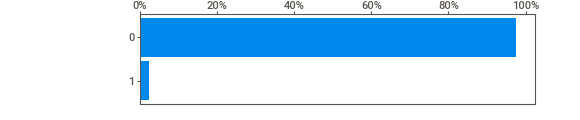
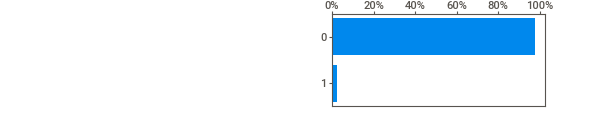
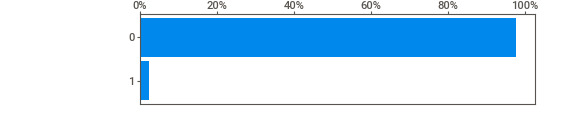
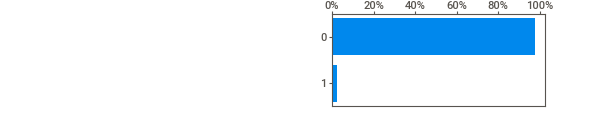
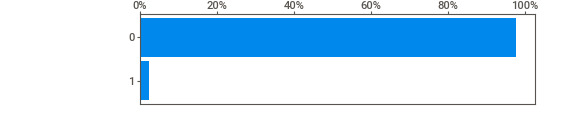
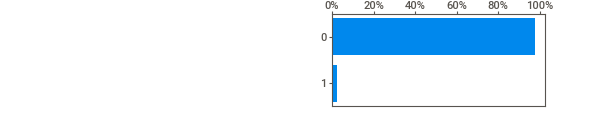
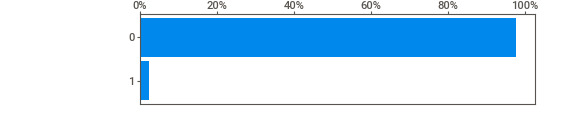
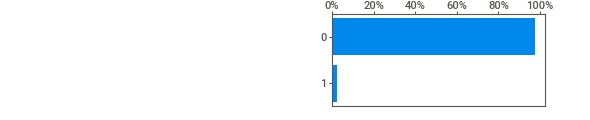
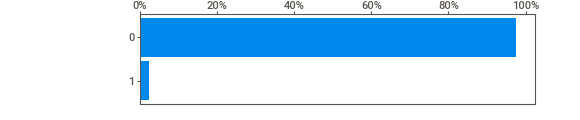
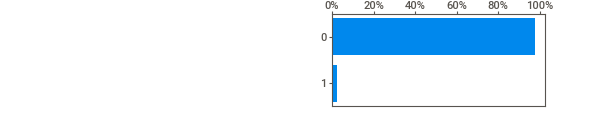
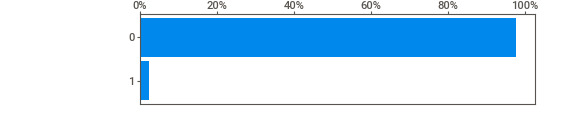
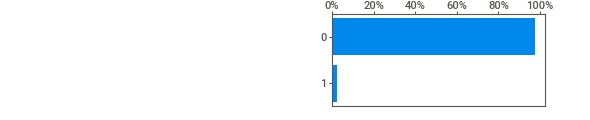
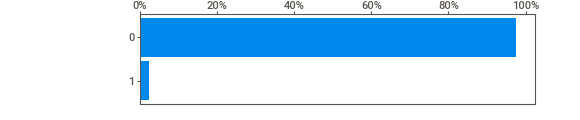
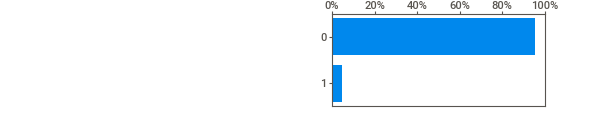
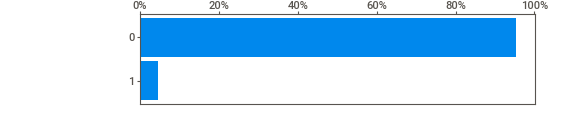
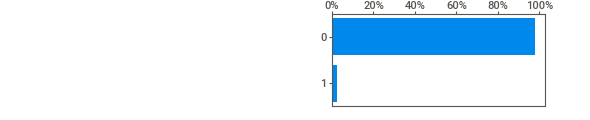
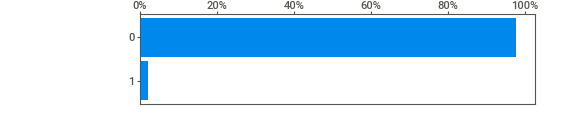
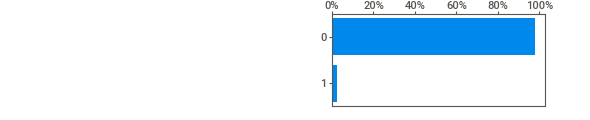
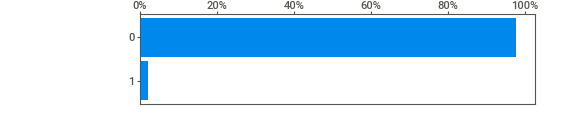
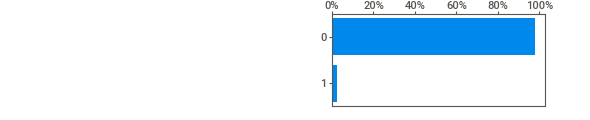
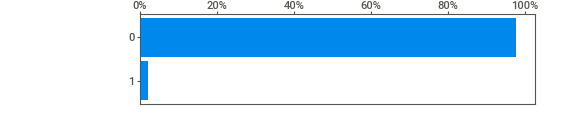
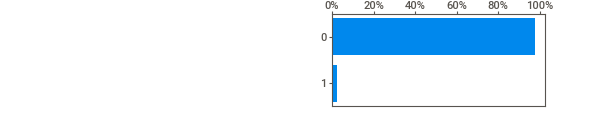
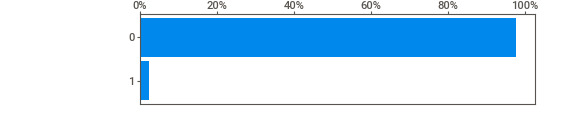
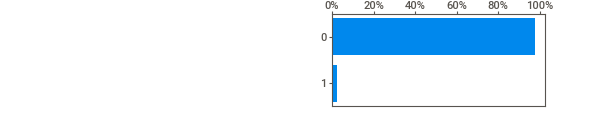
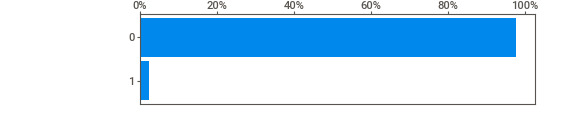
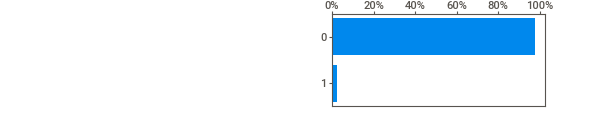
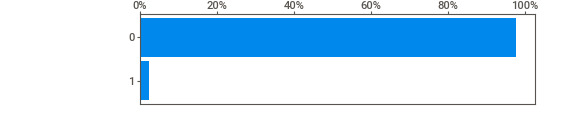
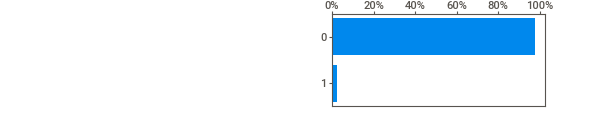
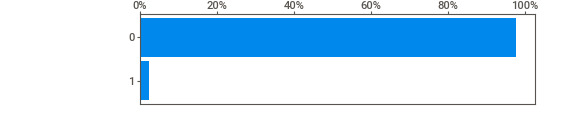
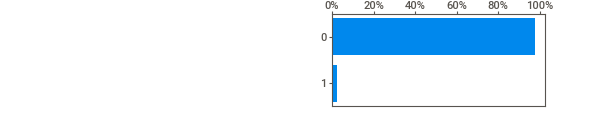
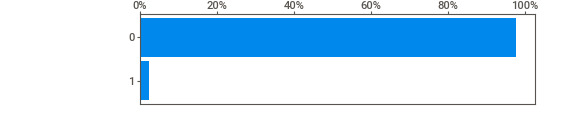
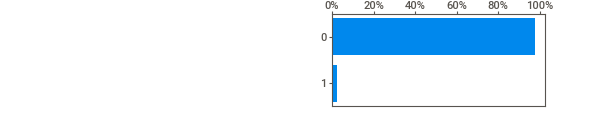
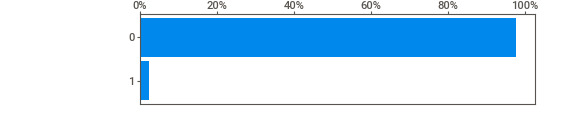
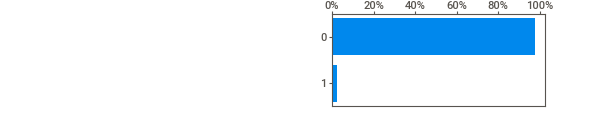
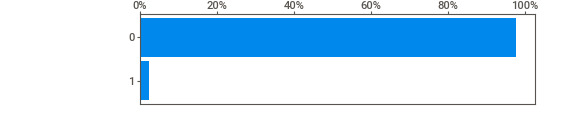
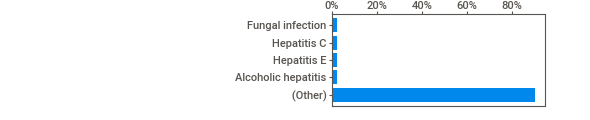
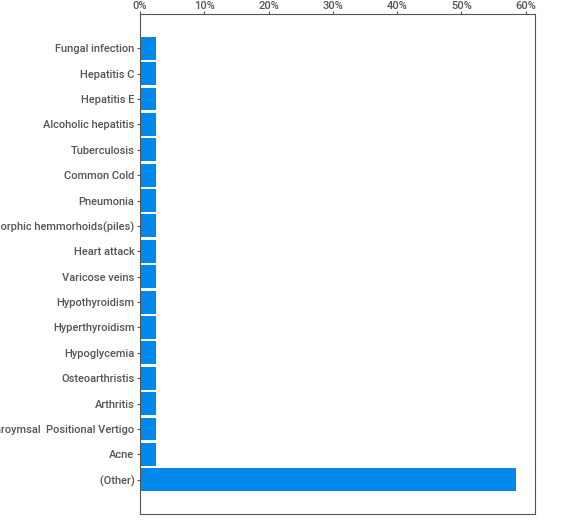
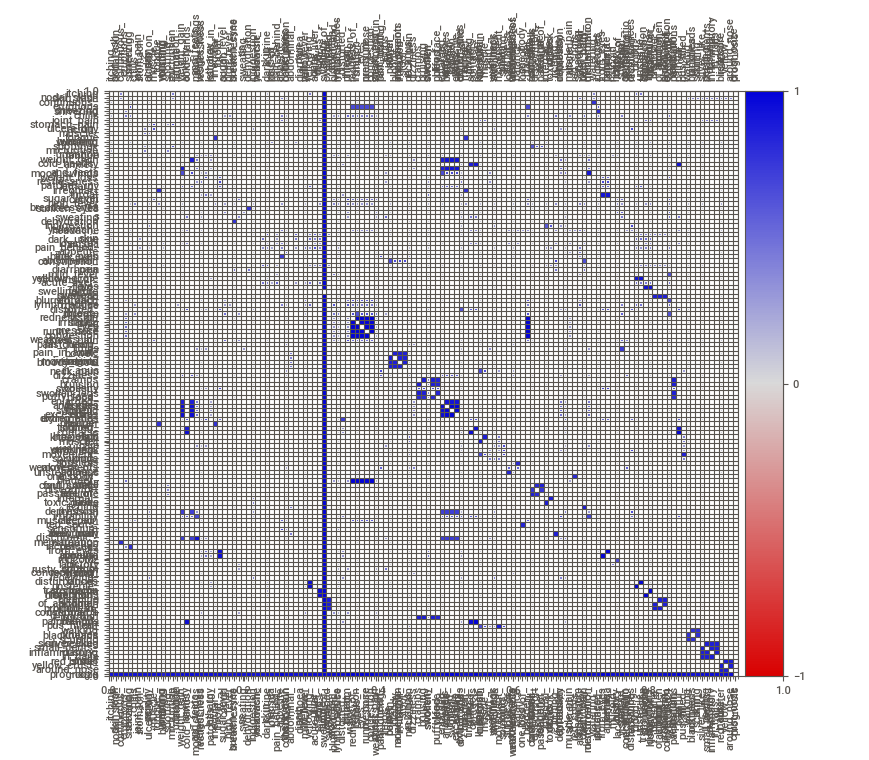
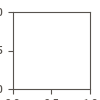

In [17]:
report = sv.analyze(data)
report.show_notebook()


**Deleting the Unnamed Column as it has it contains 100% of 'Nulls'**

In [22]:

data.drop(columns=['Unnamed: 133'], inplace =True)
data

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
0     ...           0         0             0                    0   
1     ...           0         0             0                    0   
2     ...           0         0             0                    0   
3     ...           0         0             0                    0   
4     ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4915  ...           0         0             0                    0   
4916  ...           1         1             0                    0   
4917  ...           0         0             0                    0   
4918  ...           0         0             1                    1   
4919  ...           0         0             0                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                        0                   0        0                     0   
1                        0                   0        0                     0   
2                        0                   0        0                     0   
3                        0                   0        0                     0   
4                        0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4915                     0                   0        0                     0   
4916                     0                   0        0                     0   
4917                     0                   0        0                     0   
4918                     1                   1        0                     0   
4919                     0                   0        1                     1   

      yellow_crust_ooze                                prognosis  
0                     0                         Fungal infection  
1                     0                         Fungal infection  
2                     0                         Fungal infection  
3                     0                         Fungal infection  
4                     0                    

In [ ]:
data.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples   blackheads     scurring  \
count       4920.000000  ...         4920.000000  4920.000000  4920.000000   
mean           0.021951  ...            0.021951     0.021951     0.021951   
std            0.146539  ...            0.146539     0.146539     0.146539   
min            0.000000  ...            0.000000     0.000000     0.000000   
25%            0.000000  ...            0.000000     0.000000     0.000000   
50%            0.000000  ...            0.000000     0.000000     0.000000   
75%            0.000000  ...            0.000000     0.000000     0.000000   
max            1.000000  ...            1.000000     1.000000     1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count   4920.000000          4920.000000           4920.000000   
mean       0.023171             0.023171              0.023171   
std        0.150461             0.150461              0.150461   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails      blister  red_sore_around_nose  \
count         4920.000000  4920.000000           4920.000000   
mean             0.023171     0.023171              0.023171   
std              0.150461     0.150461              0.150461   
min              0.000000     0.000000              0.000000   
25%              0.000000     0.000000              0.000000   
50%              0.000000     0.000000              0.000000   
75%              0.000000     0.000000              0.000000   
max              1.000000     1.000000              1.000000   

       yellow_crust_ooze  
count        4920.000000  
mean            0.023171  
std             0.150461  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 132 columns]

In [24]:
data['prognosis']

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

**Since the target is Categorical, we apply LabelEncoder**

In [25]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

**Splitting the dataset**

In [ ]:
X = data.drop(columns=['prognosis'])
y = data[['prognosis']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936, 1)
Test: (984, 132), (984, 1)


# Model Building

**K-Fold Cross-Validation**

**Lets perform K-Fold Cross-Validation to evaluate the performance of three different machine learning models: Support Vector Classifier (SVC), Gaussian Naive Bayes (GNB), and Random Forest Classifier. The goal is to measure how well each model performs on the dataset by splitting the data into 10 folds (10-Fold Cross-Validation).**

In [28]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))


models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}


for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


# Conclusion
**We can notice that all our machine learning algorithms are performing very well and the mean scores after k fold cross-validation are also very high.**

# Building robust classifier by combining all models

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


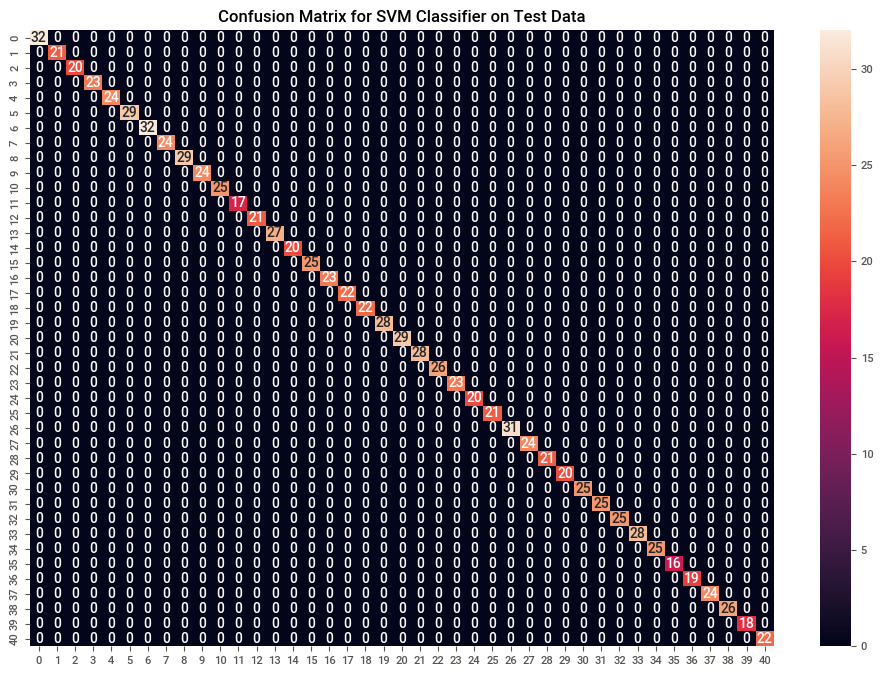

In [29]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()



# 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


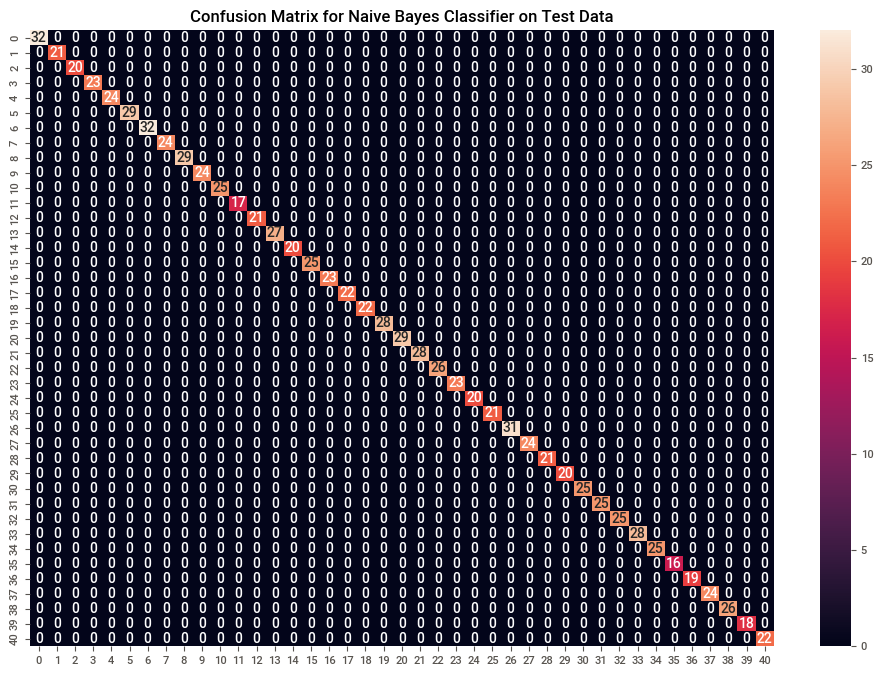

In [30]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


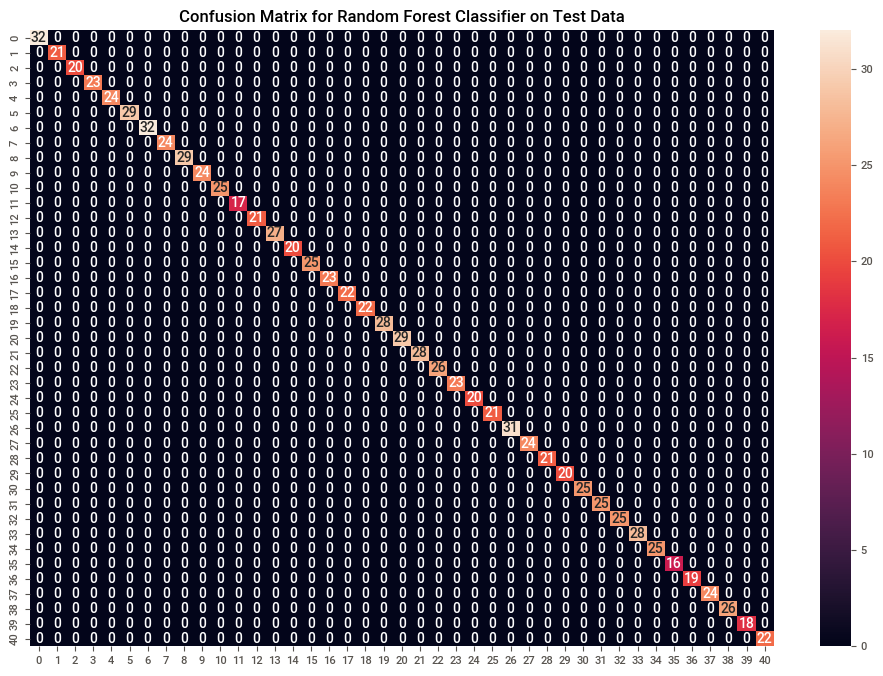

In [31]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy on Test dataset by the combined model: 100.0


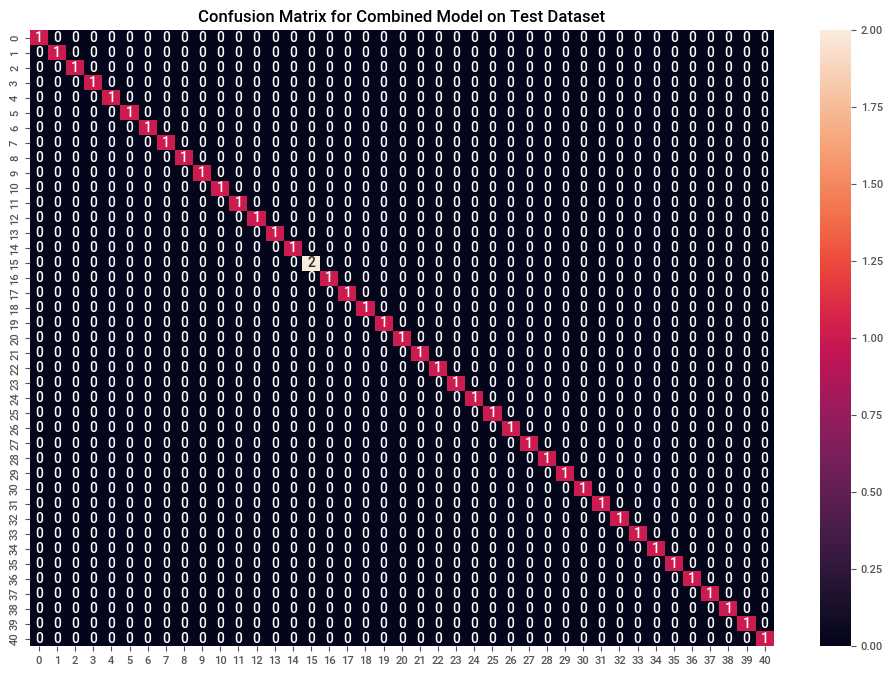

In [ ]:

final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)


test_data = pd.read_csv("./data/Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])


svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)


final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()




# Saving the Model

In [40]:
import joblib
import os
from scipy import stats
import shutil




models_folder = './models/'


os.makedirs(models_folder, exist_ok=True)


joblib.dump(final_svm_model, os.path.join(models_folder, 'svm_model.pkl'))
joblib.dump(final_nb_model, os.path.join(models_folder, 'nb_model.pkl'))
joblib.dump(final_rf_model, os.path.join(models_folder, 'rf_model.pkl'))
joblib.dump(encoder, os.path.join(models_folder, 'encoder.pkl'))




def combine_predictions(svm_preds, nb_preds, rf_preds, encoder):
    # Get mode (majority vote) of predictions
    final_preds = [stats.mode([i, j, k], keepdims=True).mode.item() for i, j, k in zip(svm_preds, nb_preds, rf_preds)]
    
    # Convert encoded labels back to prognosis names
    svm_prognosis = encoder.inverse_transform(svm_preds)
    nb_prognosis = encoder.inverse_transform(nb_preds)
    rf_prognosis = encoder.inverse_transform(rf_preds)
    final_prognosis = encoder.inverse_transform(final_preds)

    # Return a DataFrame with human-readable prognosis names
    return pd.DataFrame({
        "SVM Prediction": svm_prognosis,
        "Naive Bayes Prediction": nb_prognosis,
        "Random Forest Prediction": rf_prognosis,
        "Final Prediction": final_prognosis
    })

joblib.dump(combine_predictions, os.path.join(models_folder, 'combine_predictions.pkl'))


shutil.make_archive('./models.zip', 'zip', models_folder)

print("Models and encoder saved successfully!")


Models and encoder saved successfully!
